<a href="https://colab.research.google.com/github/Meryem12345/Deneme/blob/main/deepLearning_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM
from tensorflow.keras.optimizers import Adam # - Works
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model
from TurkishStemmer import TurkishStemmer
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('turkish')
stop_word_list

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [14]:
!pip install TurkishStemmer 

In [15]:
dataset = pd.read_excel('sentiment_analysis.xlsx', sheet_name = 'Sheet1')
dataset

,Text,Sentiment
0,bana beklediğim cevapları vermiyorsun,0
1,senden istediğim cevaplar bunlar değil,0
2,verdiğin yanıtlar doğru değil,0
3,duymak istediğim cevaplar bunlar değil,0
4,seni seviyorum bro,1
...,...,...
19018,J7 Pro Cihazı Geldi Fakat Faturası Gelmedi!,0
19019,Müşteri Hizmetlerine Ulaşamama Sorunu!,0
19020,Para İadesi Sorunu!,0
19021,Mağdur Ediyor!,0


In [16]:
dataset['Text'] = dataset['Text'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
dataset['Text'] = dataset['Text'].apply(lambda x: x.lower())
dataset['Text'] = dataset['Text'].apply(lambda x: x.strip())
kokbul = TurkishStemmer()


def token(values):
    words = nltk.tokenize.word_tokenize(values)
    filtered_words = [word for word in words if word not in stop_word_list]
    not_stopword_doc = " ".join(filtered_words)
    words2 = nltk.tokenize.word_tokenize(not_stopword_doc)
    stems=[]
    for w in words2:
        stems.append(kokbul.stem(w))
    return ' '.join(stems)
    

dataset['Text'] = dataset['Text'].apply(lambda x: token(x))

In [17]:
dataset['Text']

0                ban bekledik cevap vermiyor
1                sen istedik cevap bun değil
2                    verdik yanıt doğr değil
3             duymak istedik cevap bun değil
4                            sen seviyor bro
                        ...                 
19018    j7 pro cihaz gelt fakat fatura gelm
19019              müşter hizmet ulaşama sor
19020                        par i̇adesi sor
19021                          mağdur ediyor
19022       ürün aldık halde para i̇ade etme
Name: Text, Length: 19023, dtype: object

In [18]:
data = dataset['Text'].values.tolist()
sentiment = dataset['Sentiment'].values.tolist()

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,sentiment,test_size = 0.2, random_state = 42)

In [20]:
x_train[300]

'fiya iyi süper'

In [21]:
y_train[300]

1

In [22]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(data)
tokenizer.word_index

{'bir': 1,
 'ürün': 2,
 'iyi': 3,
 'telefon': 4,
 'güzel': 5,
 'fiyat': 6,
 'al': 7,
 'tavsi': 8,
 'eder': 9,
 'gayet': 10,
 'kalite': 11,
 'hızl': 12,
 'ben': 13,
 'gün': 14,
 'yok': 15,
 'olarak': 16,
 'teşekkür': 17,
 'var': 18,
 'olma': 19,
 'gör': 20,
 'kadar': 21,
 'özellik': 22,
 'kargo': 23,
 'elim': 24,
 '2': 25,
 'değil': 26,
 'memnu': 27,
 'şarj': 28,
 'kullan': 29,
 'kullanıyor': 30,
 'uygun': 31,
 'kullanış': 32,
 'fiya': 33,
 'iç': 34,
 'sor': 35,
 'performans': 36,
 'biraz': 37,
 'ses': 38,
 '1': 39,
 'olduk': 40,
 'cihaz': 41,
 'hız': 42,
 'yer': 43,
 'gelt': 44,
 'gerçek': 45,
 'bun': 46,
 'bi': 47,
 'zaman': 48,
 'tek': 49,
 'olt': 50,
 '3': 51,
 'sonr': 52,
 'ekran': 53,
 'cok': 54,
 'sipariş': 55,
 'arkadaş': 56,
 'benç': 57,
 'küçük': 58,
 'olan': 59,
 'kesinlik': 60,
 'önç': 61,
 'tam': 62,
 'ulaş': 63,
 'mükemmel': 64,
 'ediyor': 65,
 'marka': 66,
 'fakat': 67,
 'bilgisayar': 68,
 'ols': 69,
 'oldukç': 70,
 'bil': 71,
 'fazl': 72,
 'ancak': 73,
 'aldık': 74,
 'al

In [23]:

x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [24]:
x_train_tokens[300]

[33, 3, 99]

In [25]:
x_train[300]

'fiya iyi süper'

In [26]:

num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [27]:
np.mean(num_tokens)

17.820533038952846

In [28]:
np.max(num_tokens)

250

In [29]:

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

57

In [30]:

np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9604163381170162

In [31]:

x_train_pad = np.array(pad_sequences(x_train_tokens, maxlen=max_tokens))
x_test_pad = np.array(pad_sequences(x_test_tokens, maxlen=max_tokens))


In [32]:
np.array(x_train_pad[3027])

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 8756,  584,   15, 1668,   21, 2353, 6749, 6750, 3101,
         96,  795,  151,  104, 3574,  221, 2210,  719,  381, 8757,   72,
         15, 2270], dtype=int32)

In [33]:
x_test_pad[2000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    2,   38,   11,    6,   20,
         76,   61, 3173,    4,  225,  237,  110, 2567,   73, 1125,    3,
       1554,  135], dtype=int32)

In [34]:

idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))


def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#ardışık bir model
model =Sequential()

embedding_size = 50


model.add(Embedding(input_dim=10000,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [36]:
!pip install tensorflow==2.2.0rc2
!pip install keras==2.2.4

     |████████████████████████████████| 516.2 MB 2.4 kB/s 
     |████████████████████████████████| 2.9 MB 17.2 MB/s 
     |████████████████████████████████| 454 kB 25.7 MB/s 
     |████████████████████████████████| 3.0 MB 44.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

     |████████████████████████████████| 312 kB 5.0 MB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [37]:

model.add(LSTM(units=16, return_sequences=True))

model.add(LSTM(units=8, return_sequences=True))

model.add(LSTM(units=4))

model.add(Dense(1, activation='sigmoid'))

In [38]:


adam = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 57, 50)            500000    
_________________________________________________________________
lstm (LSTM)                  (None, 57, 16)            4288      
_________________________________________________________________
lstm_1 (LSTM)                (None, 57, 8)             800       
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 505,301
Trainable params: 505,301
Non-trainable params: 0
_________________________________________________________________


In [40]:

x_train_pad=np.array(x_train_pad)
y_train =np.array(y_train)

history = model.fit(x_train_pad, y_train, epochs=5, batch_size=64,validation_split=0.25)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
179/179 [==============================] - ETA: 0s - loss: 0.4699 - accuracy: 0.8001WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f1309234ef0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the

In [41]:
model.save("sentiment_model.h5")

In [42]:

x_test_pad=np.array(x_test_pad)
y_test =np.array(y_test)
result = model.evaluate(x_test_pad, y_test)

119/119 [==============================] - 3s 22ms/step - loss: 0.2567 - accuracy: 0.9191


In [43]:
result[1]

0.919053852558136

In [44]:
y_pred = model.predict_classes(x=x_test_pad[:700])


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [45]:
y_pred = y_pred.T[0]

In [46]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [77]:
text = "j7 pro cihaz gelt fakat fatura gelm."
texts = [text]
tokens = tokenizer.texts_to_sequences(texts)

In [78]:
tokens_pad = pad_sequences(tokens,maxlen = max_tokens)
tokens_pad.shape

(1, 57)

In [79]:
print("moralinizin {} olduğunu görüyorum. ".format(model.predict_classes(tokens_pad).tolist()[0][0]))


moralinizin 1 olduğunu görüyorum. 


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


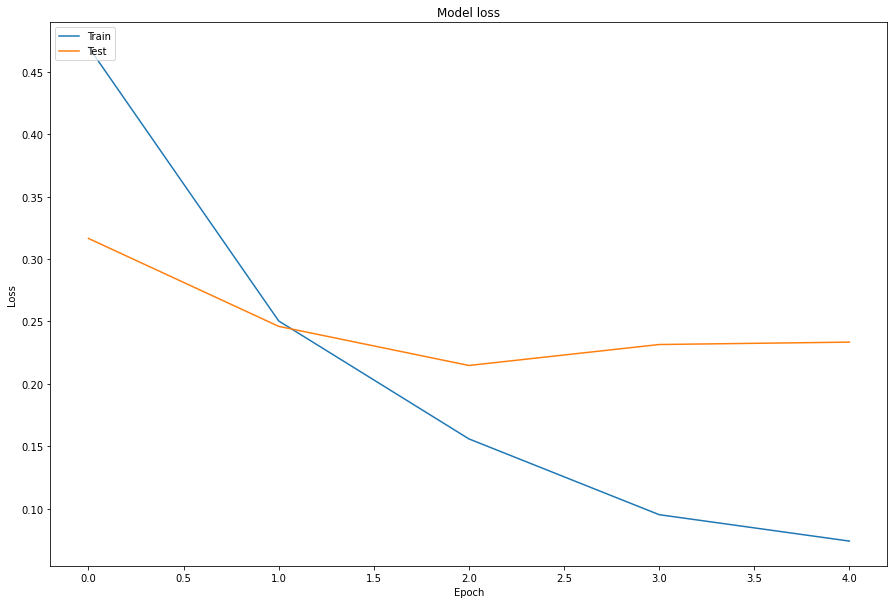

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

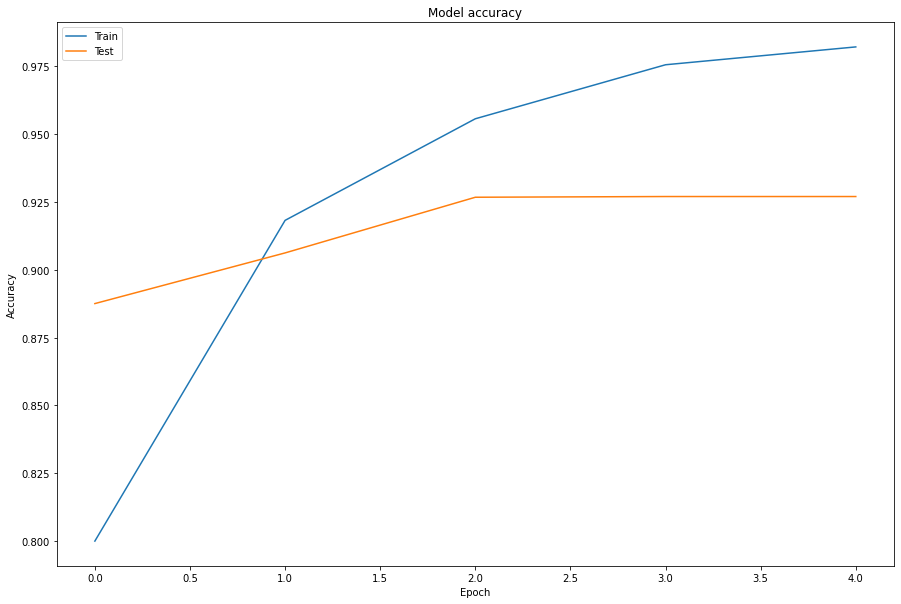

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Yeni Bölüm